In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [2]:
data = pd.read_csv(r"D:\Personal_Projects\ai-bootcamp\section_23_Sentiment_Analysis\book_reviews_sample.csv")

In [16]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [ ]:
# Remove punctuation and set to lowercase
data['reviewText_clean'] = data['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

In [18]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [19]:
vader_sentiment = SentimentIntensityAnalyzer()

In [22]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])

In [23]:
data['vader_sentiment_score'].head()

0    0.7684
1    0.9325
2    0.6740
3    0.6652
4   -0.4767
Name: vader_sentiment_score, dtype: float64

In [24]:
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

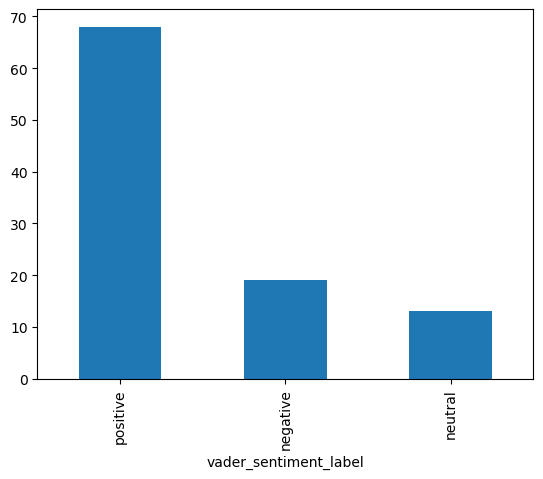

In [25]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [26]:
transformer_pipeline = pipeline("sentiment-analysis", model = "finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [28]:
transformer_labels = []

for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)

In [29]:
transformer_labels

[['POS'],
 ['POS'],
 ['NEG'],
 ['NEG'],
 ['NEG'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['NEG'],
 ['NEG'],
 ['NEG'],
 ['POS'],
 ['NEG'],
 ['NEG'],
 ['NEU'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['NEU'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['NEG'],
 ['NEU'],
 ['NEU'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['NEG'],
 ['NEU'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['NEU'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['NEU'],
 ['NEU'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['NEG'],
 ['POS'],
 ['NEU'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['NEG'],
 ['NEG'],
 ['NEG'],
 ['NEG'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['NEU'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['NEG'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['NEU'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['POS'],
 ['POS']]

In [30]:
data['transformer_sentiment_label'] = transformer_labels


<Axes: xlabel='transformer_sentiment_label'>

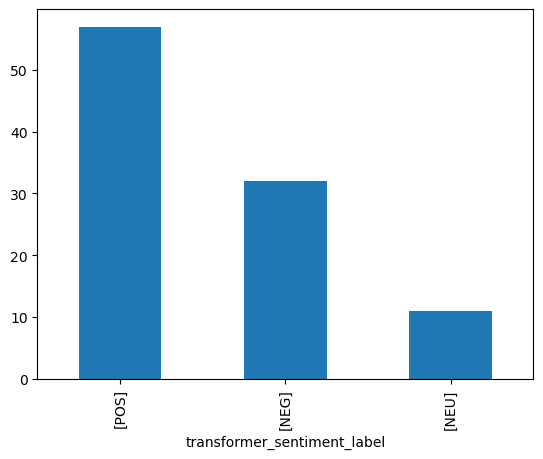

In [31]:
data['transformer_sentiment_label'].value_counts().plot.bar()